<b>Building my Data Story</b><br>
Nora Keenan<br>
February 7, 2019

After reviewing the available fields and the quality of the support documentation, I've narrowed down the dataset to 24 features ranging from age, sex and education level to marital status and state.  For me, the first step in understanding how these features may interact with each other is to build a correlation matrix with all 24 features and look for any meaningful interaction.

In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Build the dataframe
filepath = "C:\\Users\\nkeen\\Documents\\Capstone1\\Data\\Survey_results.xlsx"

excelfile = pd.read_excel(filepath)

keycols = excelfile[['psraid', 'sex', 'age', 'marital', 'par', 'educ2', 'emplnw', 'disa', 'party', 'ideo', 'hisp', 'race', 'inc']]
keycols1 = excelfile[['psraid', 'hh1', 'state', 'live1', 'reg', 'eminuse','intmob', 'home3nw', 'bbhome1', 'smart1', 'libusea', 'libuseb', 'lib_frq']]

totalcol = pd.merge(keycols, keycols1, how='inner', on='psraid')

totalcol = totalcol.replace("  ", 8)
totalcol = totalcol.replace(" ", 8)
totalcol = totalcol.drop('psraid', axis=1)
totalcol.columns

Index(['sex', 'age', 'marital', 'par', 'educ2', 'emplnw', 'disa', 'party',
       'ideo', 'hisp', 'race', 'inc', 'hh1', 'state', 'live1', 'reg',
       'eminuse', 'intmob', 'home3nw', 'bbhome1', 'smart1', 'libusea',
       'libuseb', 'lib_frq'],
      dtype='object')

<function matplotlib.pyplot.close(fig=None)>

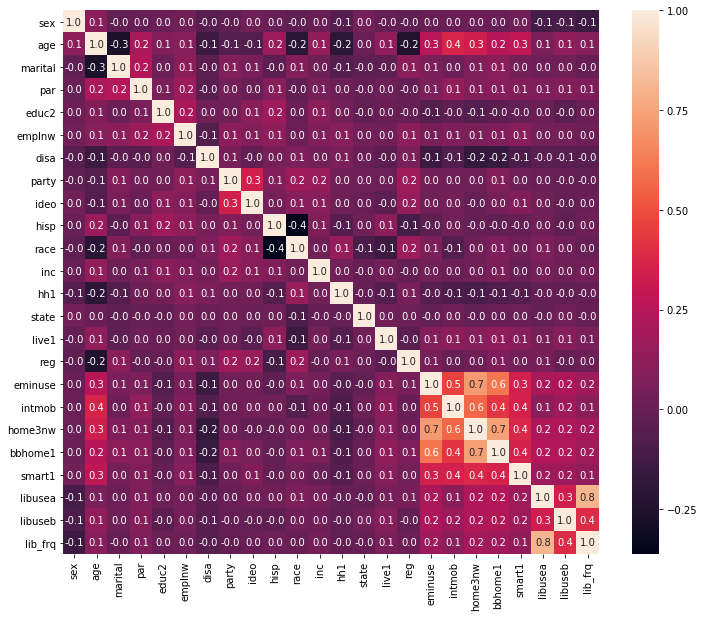

In [3]:
#Generate Correlation Heatmap

plt.figure(figsize = (12,10))
sns.heatmap(totalcol.corr(), annot=True, fmt=".1f")
plt.close


It appears that most correlations are between -.1 and +.1, meaning not a lot of correlation.  There is some positive correlation around the responses related to internet and email usage.  There's also some correlation around the type of library usage.  For example, library use frequency (lib_frq) has a higher correlation with library visits (libusea:0.8) than website visits (libuseb:0.4). Also, for those that use the internet or email (eminuse), they do so at home (home3nw) with a correlation value of 0.7.<br>
For this project I want to research what features can help determine what people visit the library and identify if those reasons vary by age, race, income and education level.

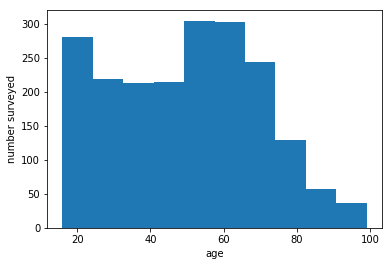

In [28]:
#Age Distribution

_ = totalcol['age'].plot(kind='hist')
_ = plt.xlabel('age')
_ = plt.ylabel('number surveyed')
plt.show()

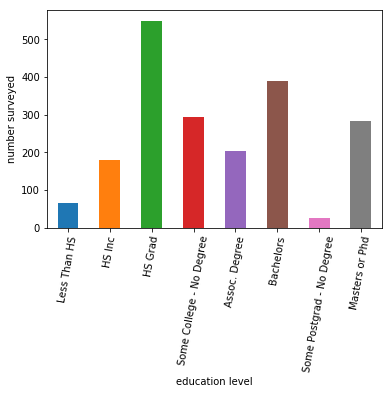

In [29]:
#Education level of respondents

_ = totalcol['educ2'].value_counts()[[1,2,3,4,5,6,7,8]].plot(kind='bar')
_ = plt.xlabel('education level')
_ = plt.ylabel('number surveyed')
_ = plt.xticks(np.arange(8), ('Less Than HS', 'HS Inc', 'HS Grad', 'Some College - No Degree', 'Assoc. Degree', 'Bachelors', 'Some Postgrad - No Degree', 'Masters or Phd'), rotation=80)
plt.show()

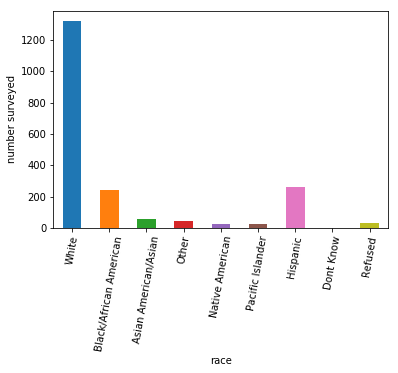

1    1320
7     262
2     243
3      57
4      42
9      31
6      24
5      23
8       2
Name: race, dtype: int64

In [37]:
#Race of respondents

_ = totalcol['race'].value_counts()[[1,2,3,4,5,6,7,8,9]].plot(kind='bar')
_ = plt.xlabel('race')
_ = plt.ylabel('number surveyed')
_ = plt.xticks(np.arange(9), ('White', 'Black/African American', 'Asian American/Asian', 'Other', 'Native American', 'Pacific Islander', 'Hispanic', 'Dont Know', 'Refused'), rotation=80)
plt.show()

totalcol['race'].value_counts()

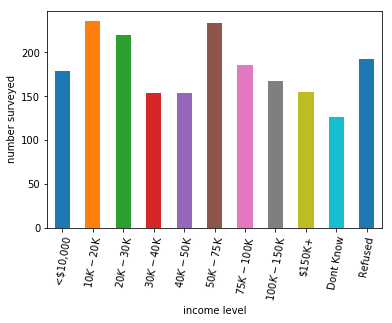

In [32]:
#Income Level of respondents

_ = totalcol['inc'].value_counts()[[1,2,3,4,5,6,7,8,9,98,99]].plot(kind='bar')
_ = plt.xlabel('income level')
_ = plt.ylabel('number surveyed')
_ = plt.xticks(np.arange(11), ('<$10,000', '$10K-$20K','$20K-$30K', '$30K-$40K', '$40K-$50K', '$50K-$75K', '$75K-$100K', '$100K-$150K', '$150K+', 'Dont Know', 'Refused'), rotation=80)
plt.show()

Enter the description of the difference values for libeusea here

Value 1: Have visited the library in the last 12 months
Value 2: Have visited the library but not in the last 12 months
Value 3: Have not visited the library

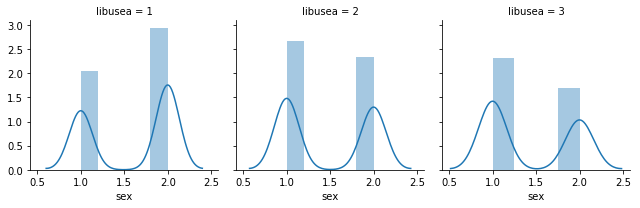

In [45]:
#analyse library visit frequency by sex

gender_and_visitation = totalcol[(totalcol['libusea'].isin([1,2,3]))]
g = sns.FacetGrid(gender_and_visitation, col='libusea')
g.map(sns.distplot, "sex")
plt.show()

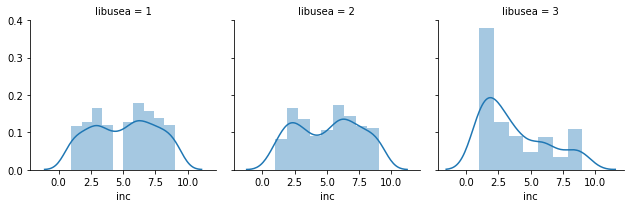

In [33]:

#analyse library visit frequency by income level

income = totalcol[(totalcol['libusea'].isin([1,2,3])) & (totalcol.inc < 97)]
g = sns.FacetGrid(income, col='libusea')
g.map(sns.distplot, "inc")
plt.show()


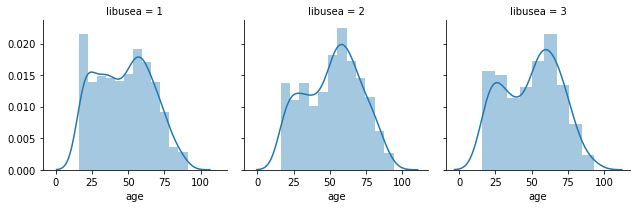

In [34]:
#analyse library visit frequency by age level

age_users = totalcol[(totalcol['libusea'].isin([1,2,3])) & (totalcol.age < 97)]
g = sns.FacetGrid(age_users, col='libusea')
g.map(sns.distplot, "age")
plt.show()

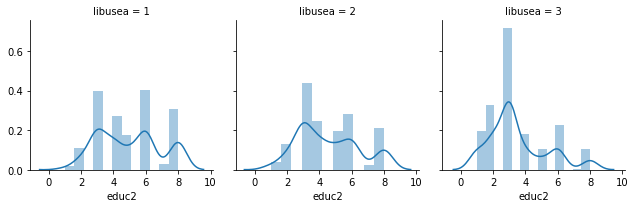

In [35]:
#analyse library visit frequency by education level

education = totalcol[(totalcol['libusea'].isin([1,2,3])) & (totalcol.educ2 < 97)]
g = sns.FacetGrid(education, col='libusea')
g.map(sns.distplot, "educ2")
plt.show()

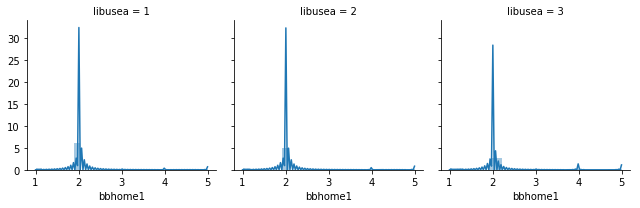

In [39]:
#analyse library visit frequency by home broadband

broadband = totalcol[(totalcol['libusea'].isin([1,2,3])) & (totalcol.bbhome1 < 6)]
g = sns.FacetGrid(broadband, col='libusea')
g.map(sns.distplot, "bbhome1")
plt.show()

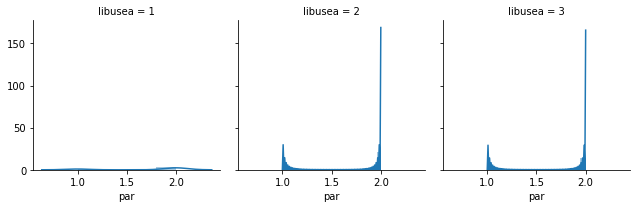

In [41]:
#analyse library visit frequency by parents

parents = totalcol[(totalcol['libusea'].isin([1,2,3])) & (totalcol.par < 3)]
g = sns.FacetGrid(parents, col='libusea')
g.map(sns.distplot, "par")
plt.show()

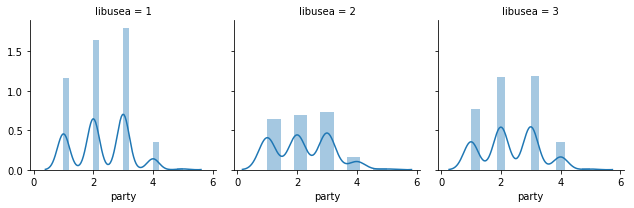

In [42]:
#analyse library visit frequency by political party
#1 = Republican
#2 = Democrat
#3 = Independent
#4 = No preference
#5 = Other Party

political_party = totalcol[(totalcol['libusea'].isin([1,2,3])) & (totalcol.party < 6)]
g = sns.FacetGrid(political_party, col='libusea')
g.map(sns.distplot, "party")
plt.show()

<h3>Inferences</h3>

In the analyses above I used a heatmap, bar chart and histogram to gain insights from the data.  It appears that <u>income and education level</u> distributions are different for people that visit the library compared to those that don't.  Also, <u>Democrats and Independents use the library more than Republicans</u>. <u>Broadband availability at home does not appear to be a motivating factor for library usage</u>.  I would expect to see lower broadband avaiability at home for those that visit the library if in fact the library was a main point of access for them.  It is unclear whether sex varies by visitation.

<h4>Follow up statistics</h4>
In the inferential statistica section I would like to test if income and education levels are stiatistically different between visitors and non-visitors.  I would also like to look at the gender distribution by grouping responses from libeusea = 1 and libusea = 2 together. And it may be interesting to test whether or not Republicans, Democrats and Independents use the library at statistically different rates.